In [1]:
library(MASS)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(corrplot)
library(leaps)
library(rpart)
library(mgcv)
library(glmnet)
library(boot)
library(rpart.plot)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v purrr   0.3.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning mes

In [2]:
#loading data
data(Boston)
dim(Boston)

[1] 506  14

In [3]:
#a look at first few rows
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
#a look at structure of the data set
glimpse(Boston)

Observations: 506
Variables: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.088...
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5...
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87,...
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.5...
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.6...
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9...
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9...
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,...
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311,...
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2,...
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396...
$ lstat   <dbl> 4.98

In [5]:
#summary statistics
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [6]:
#Check for missing values
sum(is.na(Boston))

[1] 0

In [7]:
#Check for duplicated values
sum(duplicated(Boston))

[1] 0

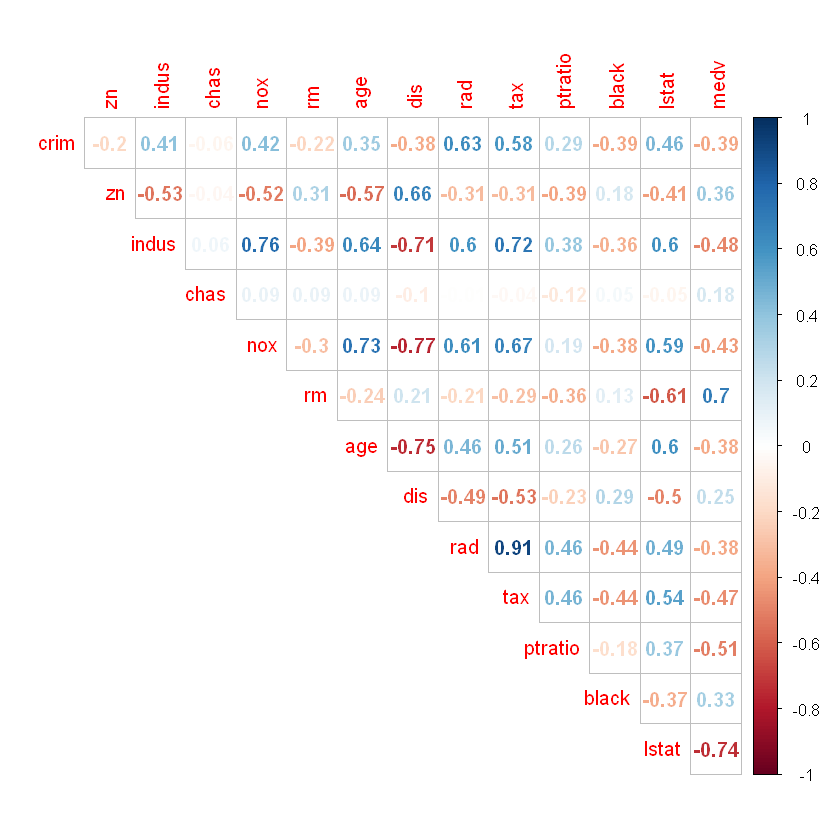

In [8]:
#checking correlation between variables
corrplot(cor(Boston), method = "number", type = "upper", diag = FALSE)

There are no missing or duplicate values.

From correlation matrix, some of the observations made are as follows:

Median value of owner-occupied homes (in 1000$) increases as average number of rooms per dwelling increases and it decreases if percent of lower status population in the area increases
nox or nitrogen oxides concentration (ppm) increases with increase in proportion of non-retail business acres per town and proportion of owner-occupied units built prior to 1940.
rad and tax have a strong positive correlation of 0.91 which implies that as accessibility of radial highways increases, the full value property-tax rate per $10,000 also increases.
crim is strongly associated with variables rad and tax which implies as accessibility to radial highways increases, per capita crime rate increases.
indus has strong positive correlation with nox, which supports the notion that nitrogen oxides concentration is high in industrial areas.

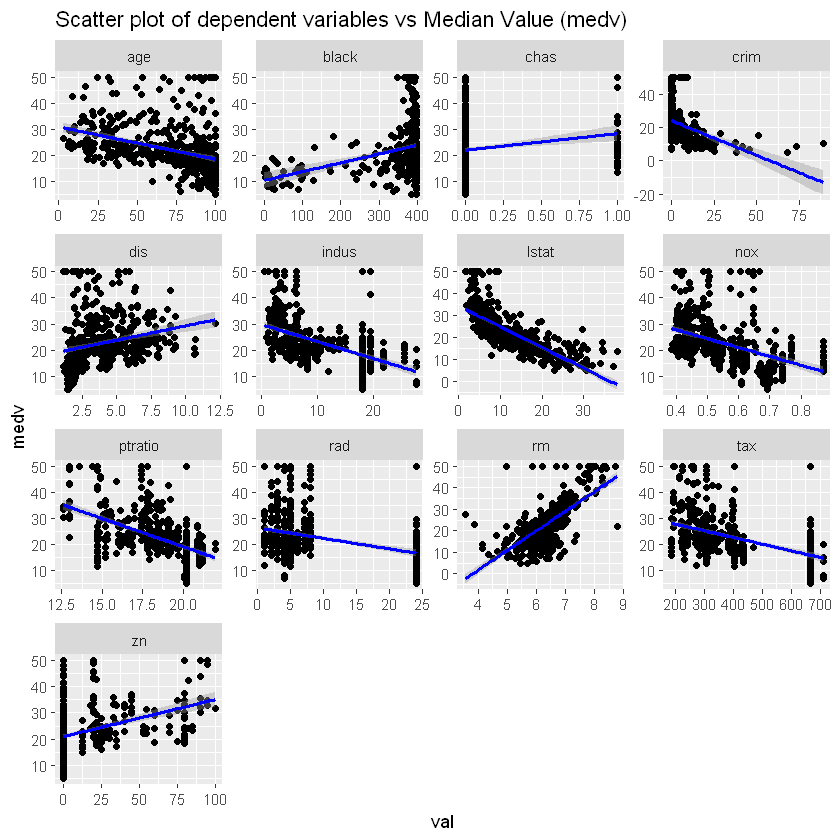

In [9]:
Boston %>%
  gather(key, val, -medv) %>%
  ggplot(aes(x = val, y = medv)) +
  geom_point() +
  stat_smooth(method = "lm", se = TRUE, col = "blue") +
  facet_wrap(~key, scales = "free") +
  theme_gray() +
  ggtitle("Scatter plot of dependent variables vs Median Value (medv)") 

In [10]:
table(Boston$chas)


  0   1 
471  35 

Observations * Proportion of owner occupied units built prior to 1940 (age) and proportion of blacks by town (black) is heavily skewed to left, while per capita crime rate in town (crim) and weighted mean of distances to five Boston employment centres (dis) is heavily skewed to right. * rm is normally distributed with mean of approximately 6. * Most of the properties are situated close to the five Boston employment centres (dis skewed to right) * There is a high proportion of owner occupied units built prior to 1940 (age skewed to left) and blacks in town (black skewed to right) * From scatter plots, it is seen that lstat and rm show strong correlation with medv. * 93% of the properties are away from Charles river. The properties bordering the river seems to have higher median prices.

In [11]:
#Split data set into 80:20 train and test data
set.seed(12383010)
index <- sample(nrow(Boston), nrow(Boston) * 0.80)
Boston.train <- Boston[index, ]
Boston.test <- Boston[-index, ]

In [12]:
#Building linear regression model
model1 <- lm(medv ~ ., data = Boston.train)
model1.sum <- summary(model1)
model1.sum


Call:
lm(formula = medv ~ ., data = Boston.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0047  -2.8339  -0.5728   1.7445  25.3953 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.610e+01  5.768e+00   6.259 1.02e-09 ***
crim        -1.215e-01  3.382e-02  -3.591 0.000371 ***
zn           5.281e-02  1.525e-02   3.463 0.000594 ***
indus       -1.819e-02  6.878e-02  -0.265 0.791514    
chas         3.210e+00  9.817e-01   3.270 0.001171 ** 
nox         -1.599e+01  4.358e+00  -3.668 0.000279 ***
rm           3.800e+00  4.743e-01   8.013 1.31e-14 ***
age         -3.628e-04  1.467e-02  -0.025 0.980285    
dis         -1.593e+00  2.302e-01  -6.918 1.88e-11 ***
rad          3.053e-01  7.538e-02   4.050 6.18e-05 ***
tax         -1.032e-02  4.328e-03  -2.384 0.017604 *  
ptratio     -9.900e-01  1.472e-01  -6.727 6.19e-11 ***
black        1.094e-02  2.964e-03   3.693 0.000254 ***
lstat       -5.476e-01  5.455e-02 -10.037  < 2e-16 ***
---
S

In [13]:
#Looking at model summary, we see that variables indus and age are insignificant
#Building model without variables indus and age
model2 <- lm(medv ~ . -indus -age, data = Boston.train)
model2.sum <- summary(model2)
model2.sum


Call:
lm(formula = medv ~ . - indus - age, data = Boston.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0002  -2.8485  -0.6089   1.7698  25.3853 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.148529   5.733495   6.305 7.78e-10 ***
crim         -0.121210   0.033721  -3.595 0.000366 ***
zn            0.053167   0.014978   3.550 0.000432 ***
chas          3.187065   0.973585   3.274 0.001156 ** 
nox         -16.334688   4.038167  -4.045 6.30e-05 ***
rm            3.814982   0.459951   8.294 1.77e-15 ***
dis          -1.576333   0.212513  -7.418 7.45e-13 ***
rad           0.310182   0.072752   4.264 2.52e-05 ***
tax          -0.010749   0.004001  -2.686 0.007532 ** 
ptratio      -0.995274   0.144709  -6.878 2.41e-11 ***
black         0.010957   0.002951   3.713 0.000235 ***
lstat        -0.548726   0.051553 -10.644  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.671 on

In [14]:
#Variable Selection using best subset regression
model.subset <- regsubsets(medv ~ ., data = Boston.train, nbest = 1, nvmax = 13)
summary(model.subset)

Subset selection object
Call: regsubsets.formula(medv ~ ., data = Boston.train, nbest = 1, 
    nvmax = 13)
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " "   "*"  
5  ( 1 )  " "  " " " "

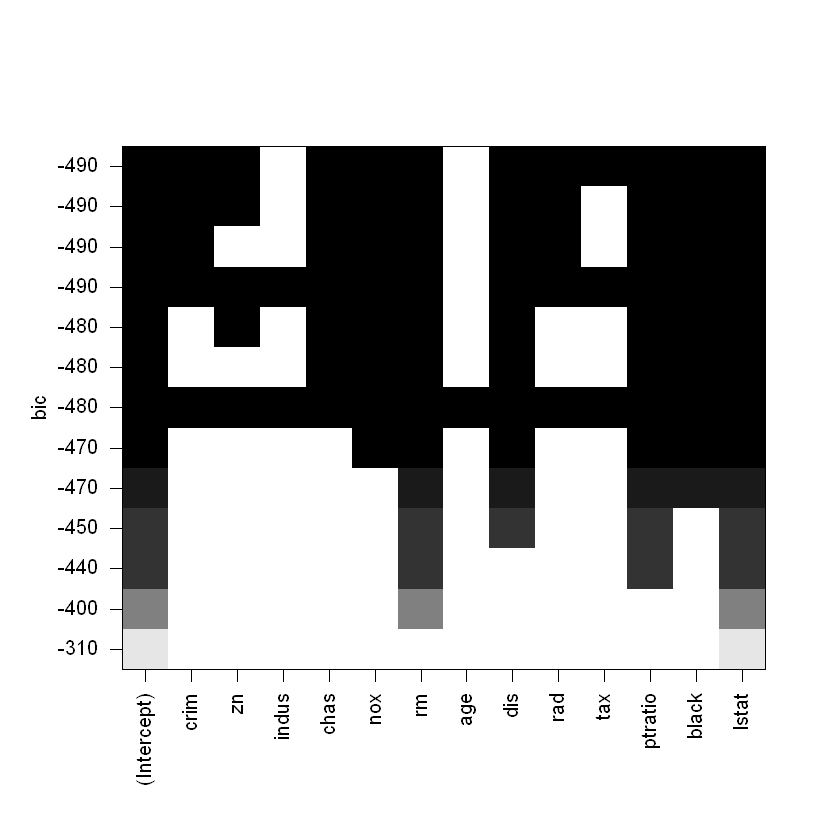

In [15]:
plot(model.subset, scale = "bic")

In [16]:
#Variable selection using stepwise regression
nullmodel <- lm(medv ~ 1, data = Boston.train)
fullmodel <- lm(medv ~ ., data = Boston.train)

#forward selection
model.step.f <- step(nullmodel, scope = list(lower = nullmodel, upper = fullmodel), direction = "forward")

Start:  AIC=1798.7
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   19010.9 15489 1477.2
+ rm       1   16593.6 17906 1535.8
+ ptratio  1    8819.9 25680 1681.4
+ indus    1    8071.4 26428 1693.0
+ tax      1    6945.5 27554 1709.9
+ nox      1    6463.6 28036 1716.9
+ age      1    5154.1 29346 1735.3
+ zn       1    5005.4 29494 1737.4
+ crim     1    4831.2 29668 1739.8
+ rad      1    4363.4 30136 1746.1
+ black    1    4047.4 30452 1750.3
+ dis      1    2113.7 32386 1775.2
+ chas     1    1007.6 33492 1788.7
<none>                 34500 1798.7

Step:  AIC=1477.17
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    3263.3 12225 1383.6
+ ptratio  1    1996.0 13493 1423.4
+ dis      1     590.0 14899 1463.5
+ chas     1     535.6 14953 1465.0
+ black    1     257.2 15232 1472.4
+ tax      1     180.6 15308 1474.4
+ crim     1     170.7 15318 1474.7
+ zn       1     167.0 15322 1474.8
+ age      1     158.7 15330 1475.0
+ indus    1      98.4 15390 1476.6
<

In [17]:
#Backward selection
model.step.b <- step(fullmodel, direction = "backward")

Start:  AIC=1261.24
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq     RSS    AIC
- age      1      0.01  8552.6 1259.2
- indus    1      1.53  8554.1 1259.3
<none>                  8552.6 1261.2
- tax      1    124.64  8677.2 1265.1
- chas     1    234.50  8787.1 1270.2
- zn       1    262.95  8815.5 1271.5
- crim     1    282.86  8835.4 1272.4
- nox      1    295.00  8847.6 1272.9
- black    1    299.03  8851.6 1273.1
- rad      1    359.71  8912.3 1275.9
- ptratio  1    992.36  9544.9 1303.6
- dis      1   1049.58  9602.1 1306.0
- rm       1   1408.05  9960.6 1320.8
- lstat    1   2209.39 10762.0 1352.1

Step:  AIC=1259.24
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq     RSS    AIC
- indus    1      1.54  8554.1 1257.3
<none>                  8552.6 1259.2
- tax      1    124.90  8677.5 1263.1
- chas     1    235.38  8788.0 1268.2
- zn    

In [18]:
#stepwise selection
model.step <- step(nullmodel, scope = list(lower = nullmodel, upper = fullmodel), direction = "both")

Start:  AIC=1798.7
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   19010.9 15489 1477.2
+ rm       1   16593.6 17906 1535.8
+ ptratio  1    8819.9 25680 1681.4
+ indus    1    8071.4 26428 1693.0
+ tax      1    6945.5 27554 1709.9
+ nox      1    6463.6 28036 1716.9
+ age      1    5154.1 29346 1735.3
+ zn       1    5005.4 29494 1737.4
+ crim     1    4831.2 29668 1739.8
+ rad      1    4363.4 30136 1746.1
+ black    1    4047.4 30452 1750.3
+ dis      1    2113.7 32386 1775.2
+ chas     1    1007.6 33492 1788.7
<none>                 34500 1798.7

Step:  AIC=1477.17
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    3263.3 12225 1383.6
+ ptratio  1    1996.0 13493 1423.4
+ dis      1     590.0 14899 1463.5
+ chas     1     535.6 14953 1465.0
+ black    1     257.2 15232 1472.4
+ tax      1     180.6 15308 1474.4
+ crim     1     170.7 15318 1474.7
+ zn       1     167.0 15322 1474.8
+ age      1     158.7 15330 1475.0
+ indus    1      98.4 15390 1476.6
<

In [19]:
AIC(model.step)

[1] 2405.815

In [20]:
BIC(model.step)

[1] 2457.833

In [21]:
summary(model.step)


Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + black + nox + 
    chas + zn + crim + rad + tax, data = Boston.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0002  -2.8485  -0.6089   1.7698  25.3853 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.148529   5.733495   6.305 7.78e-10 ***
lstat        -0.548726   0.051553 -10.644  < 2e-16 ***
rm            3.814982   0.459951   8.294 1.77e-15 ***
ptratio      -0.995274   0.144709  -6.878 2.41e-11 ***
dis          -1.576333   0.212513  -7.418 7.45e-13 ***
black         0.010957   0.002951   3.713 0.000235 ***
nox         -16.334688   4.038167  -4.045 6.30e-05 ***
chas          3.187065   0.973585   3.274 0.001156 ** 
zn            0.053167   0.014978   3.550 0.000432 ***
crim         -0.121210   0.033721  -3.595 0.000366 ***
rad           0.310182   0.072752   4.264 2.52e-05 ***
tax          -0.010749   0.004001  -2.686 0.007532 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0

From Best subset regression and stepwise selection (forward, backward, both), we see that all variables except indus and age are significant.

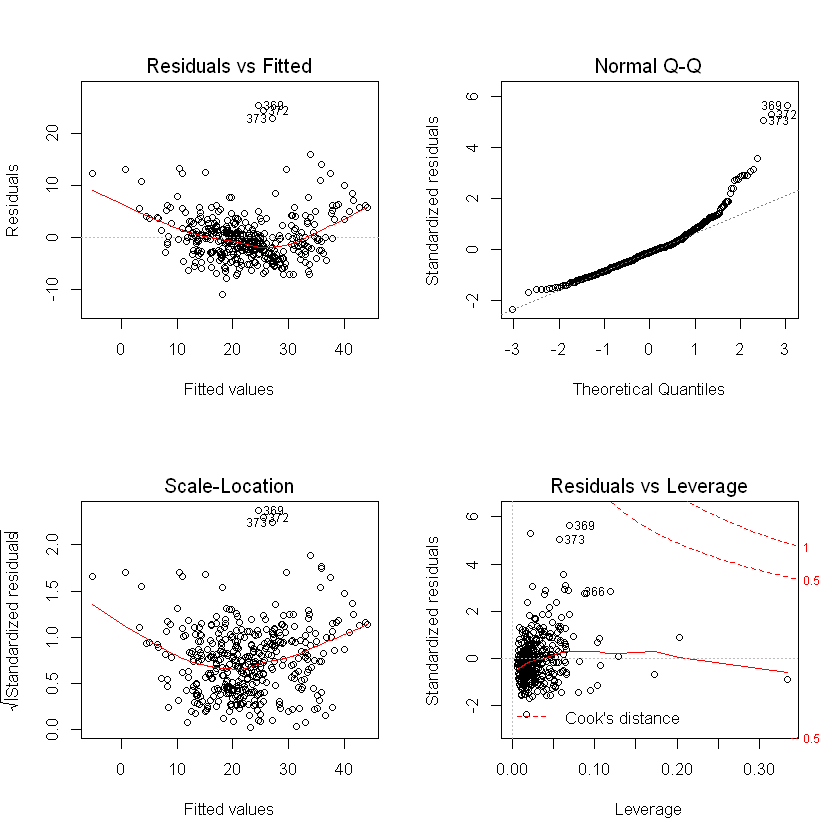

In [22]:
#Model Diagnostics for model 2
par(mfrow = c(2,2))
plot(model.step)

In [23]:
par(mfrow = c(1,1))

Residuals vs Fitted plot shows that the relationship between medv and predictors is not completely linear. Also, normal qq plot is skewed implying that residuals are not normally distributed. A different functional from may be required.

Models are compared based on adjusted r square, AIC, BIC criteria for in-sample performance and mean square prediction error (MSPE) for out-of-sample performance

In [24]:
#In-sample performance
#MSE
model.sum <- summary(model1)
(model.sum$sigma) ^ 2

[1] 21.92966

In [25]:
model2.sum <- summary(model2)
(model2.sum$sigma) ^ 2

[1] 21.82173

In [26]:
#R-squared
model1.sum$r.squared

[1] 0.7520968

In [27]:
model2.sum$r.squared

[1] 0.7520519

In [28]:
#Adjusted r square
model1.sum$adj.r.squared

[1] 0.7438334

In [29]:
model2.sum$adj.r.squared

[1] 0.7450942

In [30]:
#AIC 
AIC(model1)

[1] 2409.741

In [31]:
AIC(model2)

[1] 2405.815

In [32]:
#BIC
BIC(model1)

[1] 2469.763

In [33]:
BIC(model2)

[1] 2457.833

In [34]:
#Out-of-sample Prediction or test error (MSPE)
model1.pred.test <- predict(model1, newdata = Boston.test)
model1.mspe <- mean((model1.pred.test - Boston.test$medv) ^ 2)
model1.mspe

[1] 25.63558

In [35]:
model2.pred.test <- predict(model2, newdata = Boston.test)
model2.mspe <- mean((model2.pred.test - Boston.test$medv) ^ 2)
model2.mspe

[1] 25.55185

In [36]:
#Cross Validation
model1.glm = glm(medv ~ ., data = Boston)
cv.glm(data = Boston, glmfit = model1.glm, K = 5)$delta[2]

[1] 23.94616

In [37]:
model2.glm <- glm(medv ~ . -indus -age, data = Boston)
cv.glm(data = Boston, glmfit = model2.glm, K = 5)$delta[2]

[1] 24.30455

Based on AIC criteria and adjusted R square values, model 2 is slightly better than model 1. In-sample MSE is nearly the same for both models.

We need to check out-of-sample MSPE for both models. Based on out-of-sample prediction error, model 2 is slightly better than model 1. MSPE of model 1 is 20.7113 while that of model 2 is 20.6784. Based on cross validation also, model 2 performs better.

Fitting Regression Trees
Following regression trees were fitted to the training data. * Using default value, cp = 0.01 and no additional constraints. This resulted in a tree with 8 terminal nodes. * Making cp = 0.001 and allowing the tree to grow large This results in a tree with 27 terminal nodes. A plot of cp values vs error rates (fig 7) shows that a cp value of 0.0072 would reduce the complexity of the model. * Finally, with cp = 0.0072. This results in a tree with 10 terminal nodes.

In [38]:
#default value of cp = 0.01
Boston.tree <- rpart(medv ~ ., data = Boston.train)
Boston.tree

n= 404 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 404 34499.6200 22.66287  
   2) lstat>=9.54 241  5559.4940 17.45602  
     4) lstat>=15 131  2452.6770 14.77634  
       8) crim>=6.340595 62   866.3535 12.14516 *
       9) crim< 6.340595 69   771.4064 17.14058 *
     5) lstat< 15 110  1045.8940 20.64727 *
   3) lstat< 9.54 163 12745.8500 30.36135  
     6) rm< 7.437 140  6049.1890 27.84786  
      12) rm< 6.659 85  2655.6070 25.00588  
        24) age< 88.8 78   631.6138 23.95385 *
        25) age>=88.8 7   975.7143 36.72857 *
      13) rm>=6.659 55  1646.0520 32.24000  
        26) lstat>=5.495 24   431.9896 28.97083 *
        27) lstat< 5.495 31   758.9839 34.77097 *
     7) rm>=7.437 23   428.4548 45.66087 *

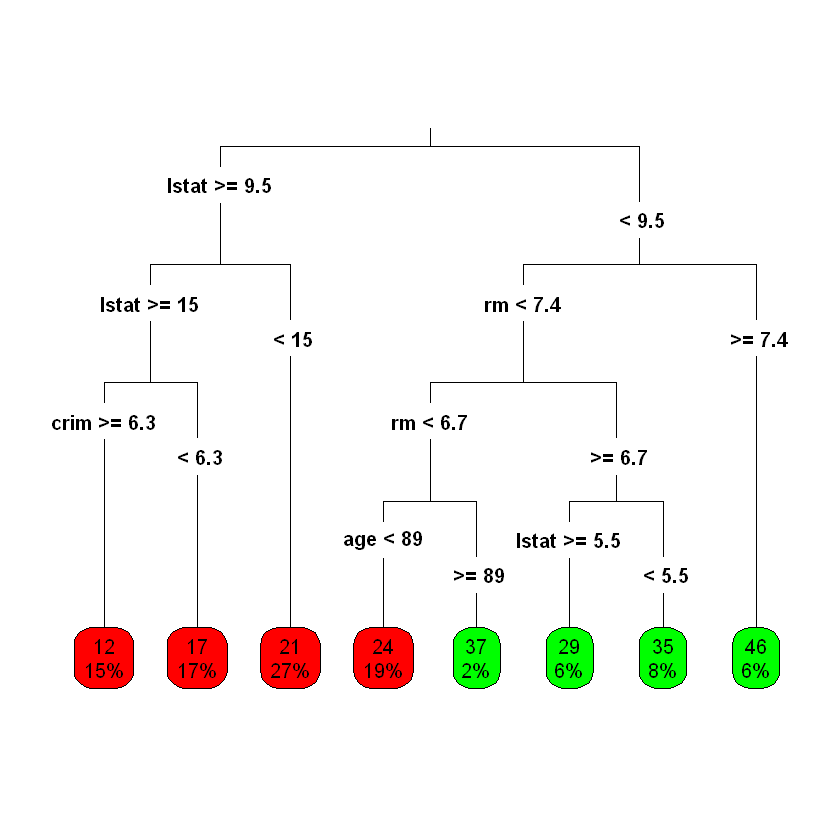

In [39]:
#Plotting the tree
rpart.plot(Boston.tree, type = 3, box.palette = c("red", "green"), fallen.leaves = TRUE)

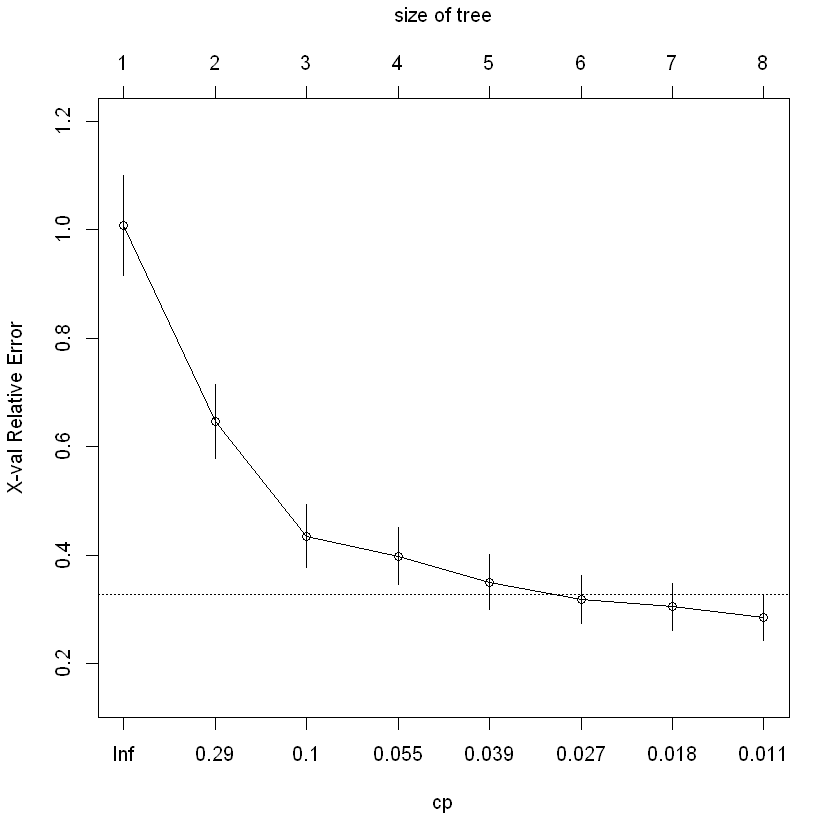

In [40]:
plotcp(Boston.tree)

In [41]:
printcp(Boston.tree)


Regression tree:
rpart(formula = medv ~ ., data = Boston.train)

Variables actually used in tree construction:
[1] age   crim  lstat rm   

Root node error: 34500/404 = 85.395

n= 404 

        CP nsplit rel error  xerror     xstd
1 0.469405      0   1.00000 1.00785 0.092199
2 0.181689      1   0.53060 0.64692 0.068944
3 0.059738      2   0.34891 0.43559 0.057519
4 0.050654      3   0.28917 0.39890 0.052278
5 0.030385      4   0.23852 0.35057 0.050465
6 0.023621      5   0.20813 0.31929 0.044387
7 0.013191      6   0.18451 0.30499 0.043422
8 0.010000      7   0.17132 0.28532 0.041913


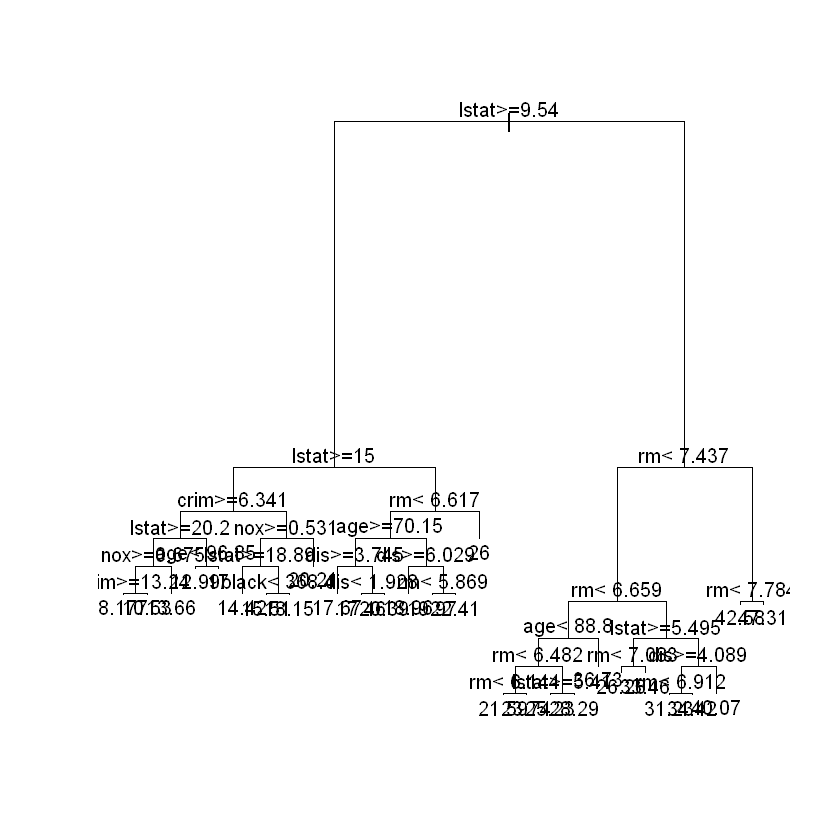

In [42]:
#Building a large tree
Boston.largetree <- rpart(formula = medv ~ ., data = Boston.train, cp = 0.001)

plot(Boston.largetree)
text(Boston.largetree)

In [43]:
printcp(Boston.largetree)


Regression tree:
rpart(formula = medv ~ ., data = Boston.train, cp = 0.001)

Variables actually used in tree construction:
[1] age   black crim  dis   lstat nox   rm   

Root node error: 34500/404 = 85.395

n= 404 

          CP nsplit rel error  xerror     xstd
1  0.4694046      0   1.00000 1.00969 0.092218
2  0.1816890      1   0.53060 0.64537 0.071631
3  0.0597375      2   0.34891 0.42519 0.058082
4  0.0506536      3   0.28917 0.41070 0.054012
5  0.0303852      4   0.23852 0.41120 0.056918
6  0.0236210      5   0.20813 0.38214 0.055279
7  0.0131908      6   0.18451 0.37023 0.055182
8  0.0083950      7   0.17132 0.32310 0.046992
9  0.0073631      8   0.16292 0.31787 0.047147
10 0.0066155      9   0.15556 0.30334 0.042926
11 0.0062085     10   0.14894 0.30473 0.042943
12 0.0056745     11   0.14274 0.30429 0.042948
13 0.0054189     12   0.13706 0.28733 0.039988
14 0.0035860     13   0.13164 0.28409 0.040029
15 0.0033858     14   0.12806 0.28445 0.039828
16 0.0027904     15   0.12467 0

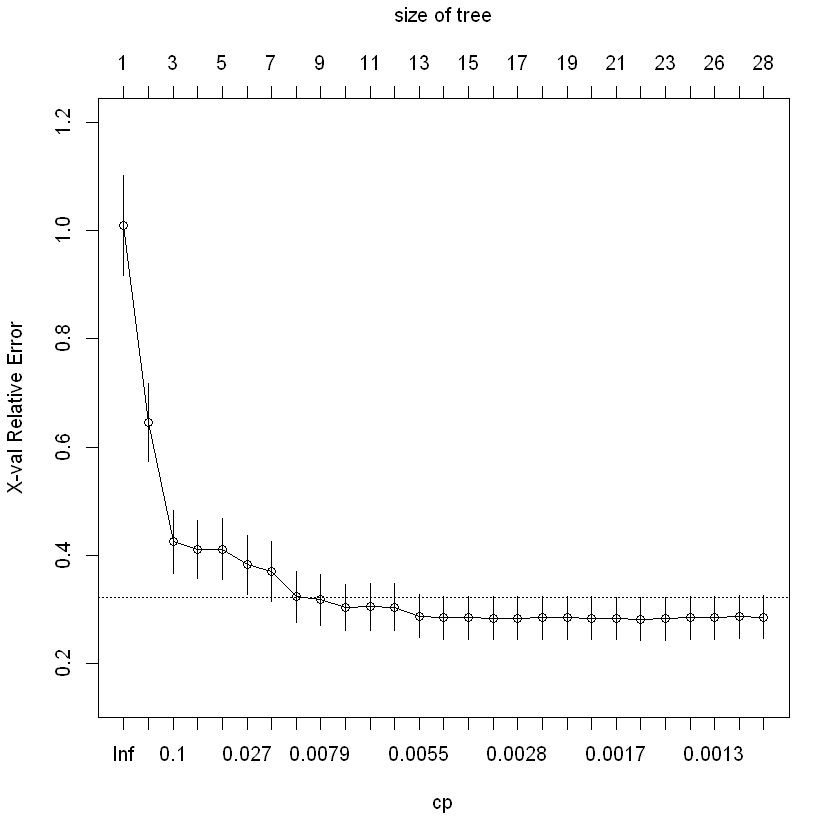

In [44]:
plotcp(Boston.largetree)

In [45]:
#however, from plotcp, we observe that a tree with more than 7 to 9 splits is not very helpful.
#further pruning the tree to limit to 9 splits;corresponding cp value from plot is 0.0072
pruned.tree <- prune(Boston.largetree, cp = 0.0072)
pruned.tree

n= 404 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 404 34499.62000 22.66287  
   2) lstat>=9.54 241  5559.49400 17.45602  
     4) lstat>=15 131  2452.67700 14.77634  
       8) crim>=6.340595 62   866.35350 12.14516 *
       9) crim< 6.340595 69   771.40640 17.14058 *
     5) lstat< 15 110  1045.89400 20.64727 *
   3) lstat< 9.54 163 12745.85000 30.36135  
     6) rm< 7.437 140  6049.18900 27.84786  
      12) rm< 6.659 85  2655.60700 25.00588  
        24) age< 88.8 78   631.61380 23.95385 *
        25) age>=88.8 7   975.71430 36.72857 *
      13) rm>=6.659 55  1646.05200 32.24000  
        26) lstat>=5.495 24   431.98960 28.97083  
          52) rm< 7.0835 15   109.68400 26.28000 *
          53) rm>=7.0835 9    32.68222 33.45556 *
        27) lstat< 5.495 31   758.98390 34.77097  
          54) dis>=4.08915 24   164.40500 33.22500 *
          55) dis< 4.08915 7   340.55430 40.07143 *
     7) rm>=7.437 23   428.45480 45.66087 *

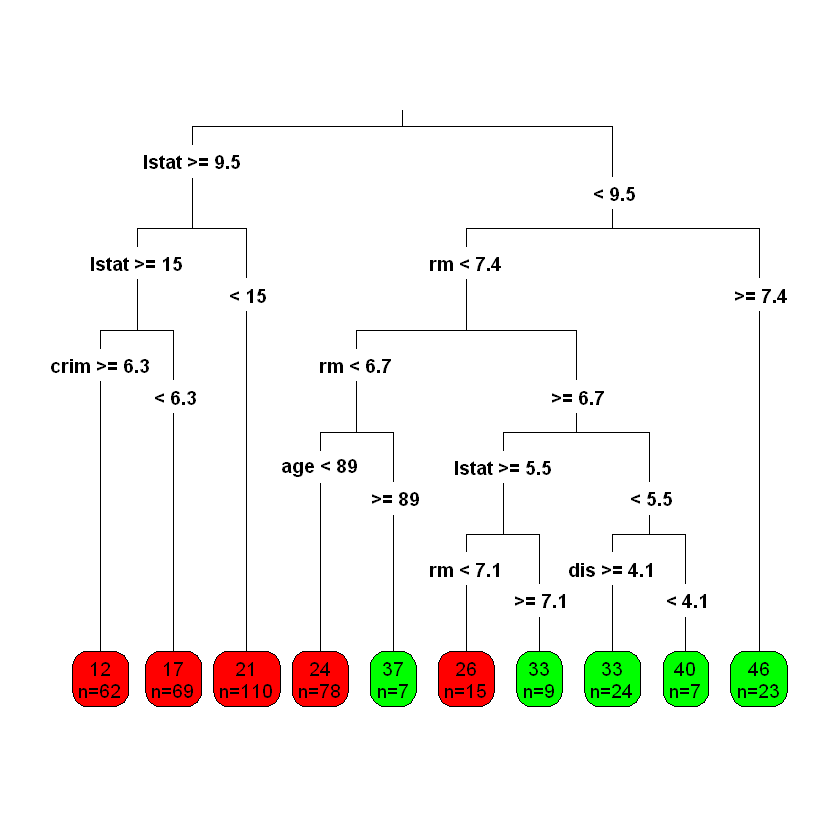

In [46]:
rpart.plot(pruned.tree, type = 3, box.palette = c("red", "green"), fallen.leaves = TRUE, extra = 1)

In [47]:
#In-sample MSE
mean((predict(Boston.tree) - Boston.train$medv) ^ 2) 

[1] 14.62973

In [48]:
mean((predict(Boston.largetree) - Boston.train$medv) ^ 2)

[1] 8.81046

In [49]:
mean((predict(pruned.tree) - Boston.train$medv) ^ 2)       #pruned tree

[1] 13.28407

In [50]:
#out-of-sample performance
#Mean squared error loss for this tree
mean((predict(Boston.tree, newdata = Boston.test) - Boston.test$medv) ^ 2)  #default tree

[1] 22.97134

In [51]:
mean((predict(Boston.largetree, newdata = Boston.test) - Boston.test$medv) ^ 2)   #large tree

[1] 20.34919

In [52]:
mean((predict(pruned.tree, newdata = Boston.test) - Boston.test$medv) ^ 2)     #pruned tree

[1] 21.90456

From plot, we can observe that cross validation error does not always go down when tree becomes more complex. We can see that a tree with more than 7 to 9 splits is not very helpful.

The large tree results in lowest in-sample and out-of-sample prediction error compared to other two trees. But there is a large difference between in-sample and out-of-sample performance for this tree. In contrast, trees with default cp value and pruned tree have lower difference between in-sample and out-of-sample prediction errors. Further, they are easier to read and interpret and do not sacrifice much in terms of out-of-sample prediction error. Since pruned has lower prediction errors compared to tree with default cp value, it is the chosen tree.

Residual diagnostics of linear regression model showed that the relation between medv and predictor variables may not be linear. Since the correct transformation of predictor variables is not known, GAM can be used to model non-linearity. GAM is fit using smoothing splines, s(), which is available in gam library in R. In the model, smoothing spline is used for all continuous variables except ‘chas’ and ‘rad’, which are of integer type and which have less than 10 unique values. It is not recommended to use smoothing splines on such variables.

In [53]:
#model 1 - not using s() on chas and rad, leaving them as integers
Boston.gam <- gam(medv ~ s(crim) + s(zn) + s(indus) + s(nox) + s(rm) + s(age) + s(dis) + 
                    s(tax) + s(ptratio) + s(black) + s(lstat) + chas + rad, data = Boston.train)
summary(Boston.gam)


Family: gaussian 
Link function: identity 

Formula:
medv ~ s(crim) + s(zn) + s(indus) + s(nox) + s(rm) + s(age) + 
    s(dis) + s(tax) + s(ptratio) + s(black) + s(lstat) + chas + 
    rad

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.6925     1.1336  17.372  < 2e-16 ***
chas          1.9526     0.6888   2.835  0.00485 ** 
rad           0.2974     0.1175   2.531  0.01181 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
             edf Ref.df      F  p-value    
s(crim)    6.883  7.847  8.881 4.57e-11 ***
s(zn)      1.000  1.000  1.168  0.28053    
s(indus)   5.278  6.273  3.841  0.00089 ***
s(nox)     8.882  8.986 12.787  < 2e-16 ***
s(rm)      4.222  5.285 35.878  < 2e-16 ***
s(age)     1.000  1.000  1.790  0.18176    
s(dis)     8.794  8.980  9.097 1.49e-12 ***
s(tax)     3.617  4.360  7.685 3.02e-06 ***
s(ptratio) 1.940  2.442 15.475 5.88e-08 ***
s(black)   5.055  6.07

Variables which have edf close to 1 have linear relationship with medv. Summary of the model shows that variables ‘zn’, ‘age’ and ‘black’ have edf of 1. This along with their p-values, indicates that they have a linear relationship with medv. Rest of the variables have a non-linear relationship with medv.

In [54]:
#model 2 - removing s() from functions which are linear
Boston.gam <- gam(medv ~ s(crim) + zn + s(indus) + s(nox) + s(rm) + age + s(dis) + 
                    s(tax) + s(ptratio) + black + s(lstat) + chas + rad, data = Boston.train)
summary(Boston.gam)


Family: gaussian 
Link function: identity 

Formula:
medv ~ s(crim) + zn + s(indus) + s(nox) + s(rm) + age + s(dis) + 
    s(tax) + s(ptratio) + black + s(lstat) + chas + rad

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.824254   1.605290  11.726  < 2e-16 ***
zn           0.010363   0.014510   0.714  0.47557    
age         -0.015084   0.011482  -1.314  0.18982    
black        0.003928   0.002116   1.856  0.06424 .  
chas         1.971064   0.691441   2.851  0.00462 ** 
rad          0.337044   0.118604   2.842  0.00475 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
             edf Ref.df      F  p-value    
s(crim)    7.024  7.997  9.276 8.77e-12 ***
s(indus)   5.584  6.592  3.629  0.00121 ** 
s(nox)     8.887  8.987 13.343  < 2e-16 ***
s(rm)      4.170  5.228 35.978  < 2e-16 ***
s(dis)     8.778  8.979  9.232 9.02e-13 ***
s(tax)     3.673  4.427  7.431 4.33e-06 ***
s(

Performance metrics of the model is shown below:

In [55]:
#Model AIC, BIC, mean residual deviance
AIC(Boston.gam)

[1] 2079.42

In [56]:
BIC(Boston.gam)

[1] 2291.118

In [57]:
Boston.gam$deviance

[1] 3129.749

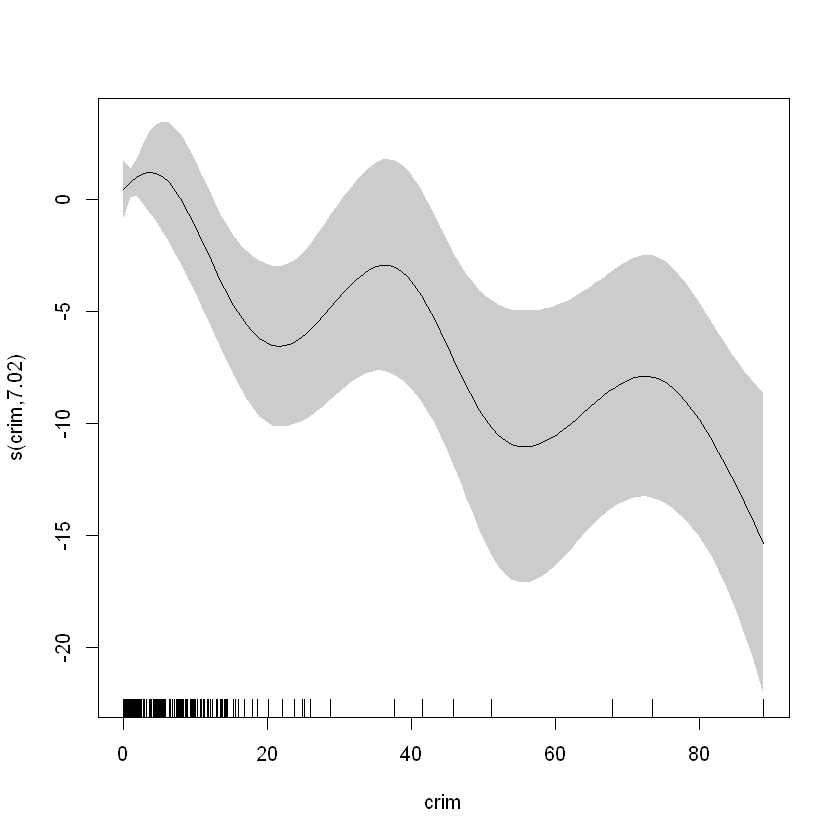

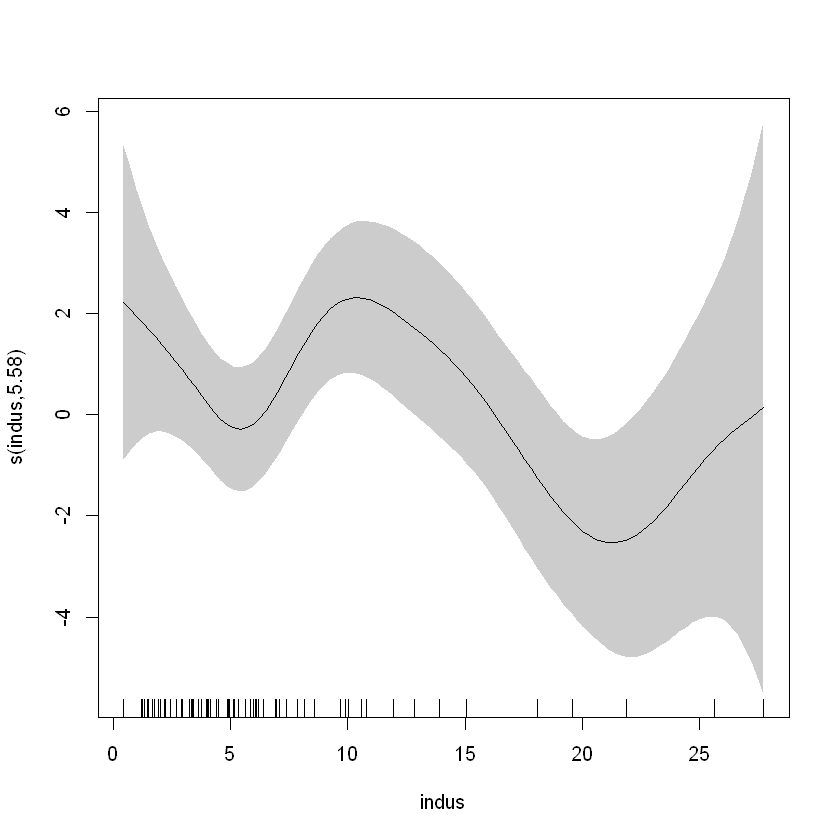

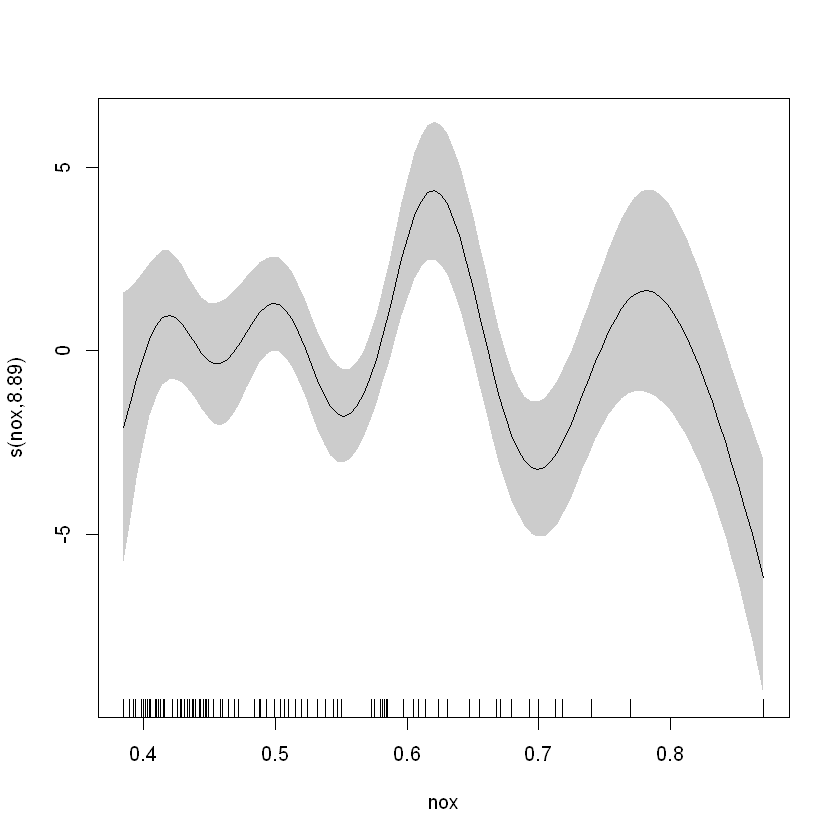

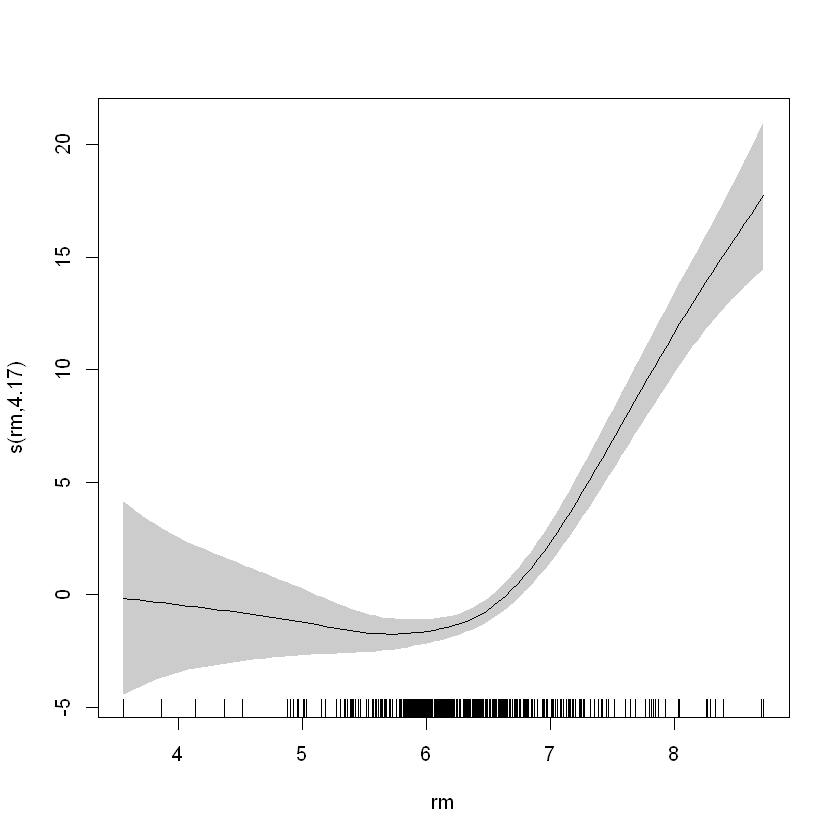

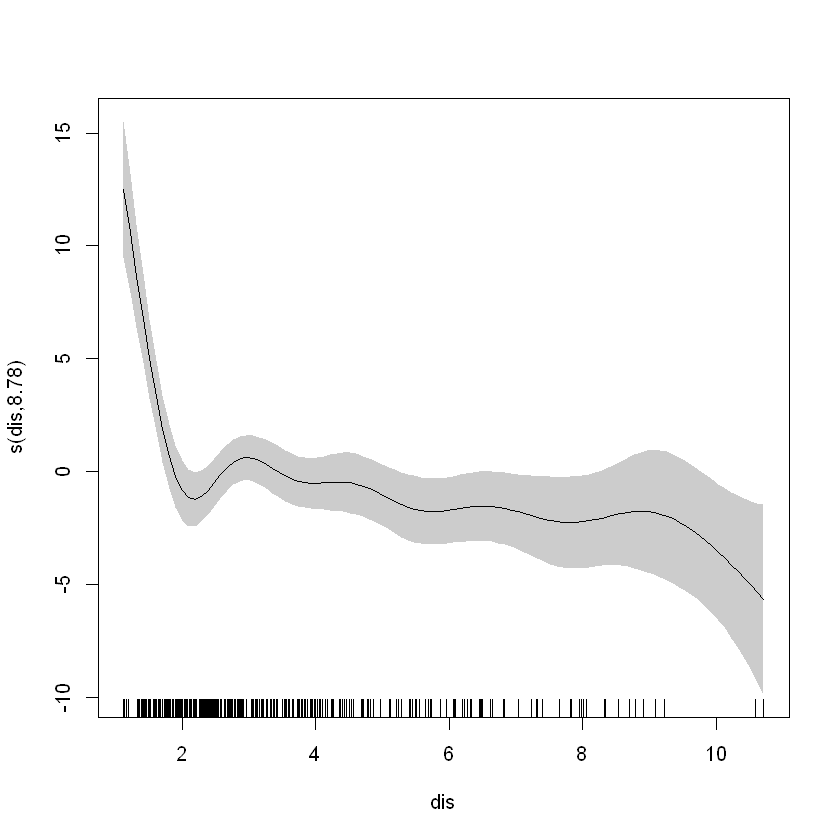

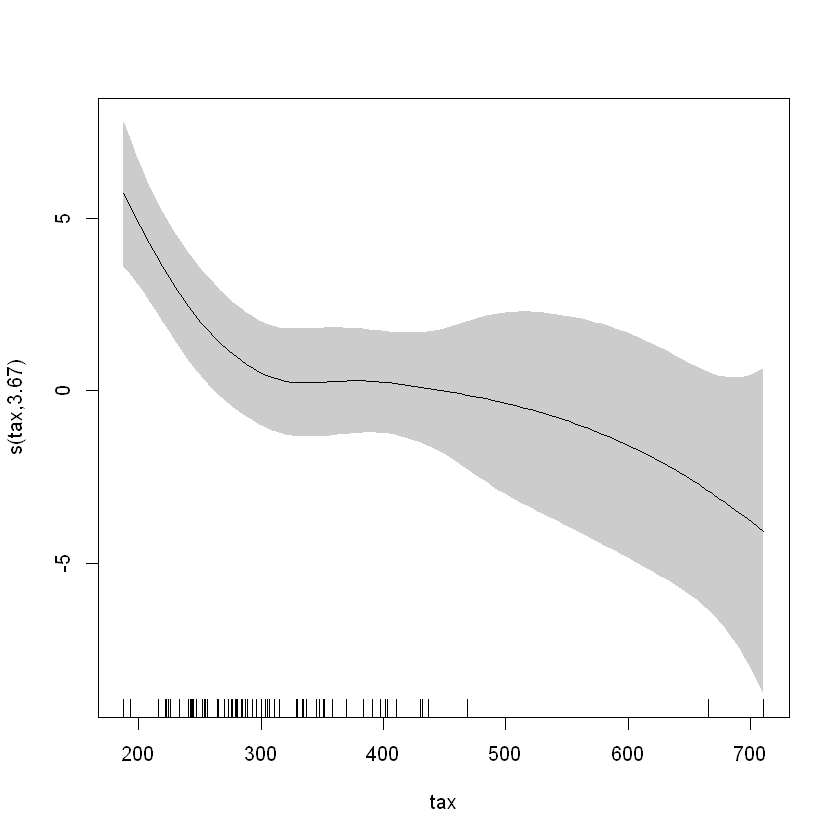

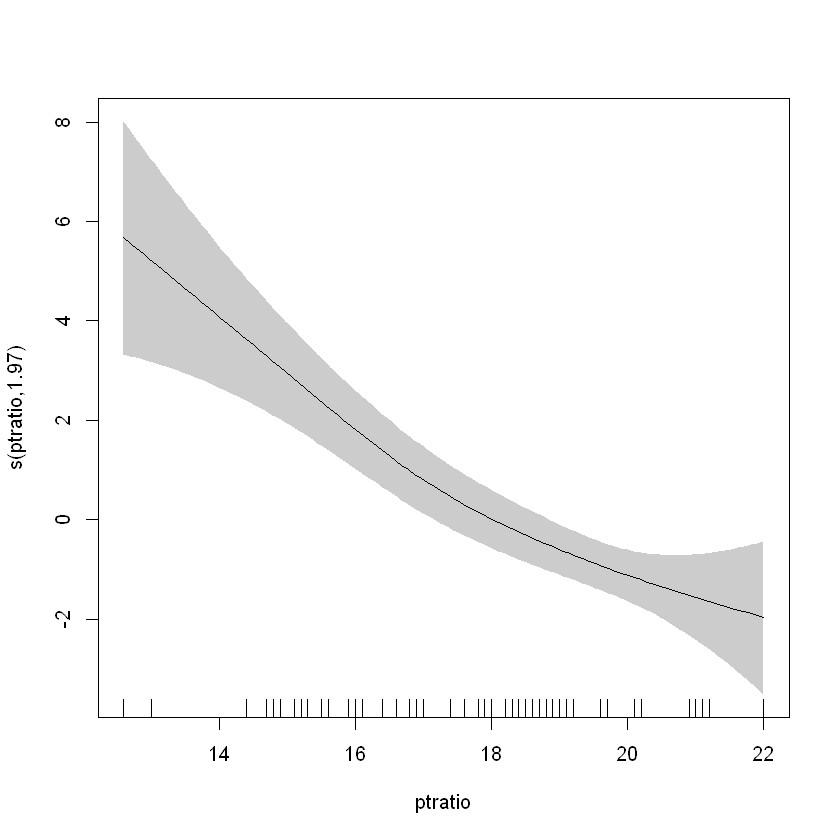

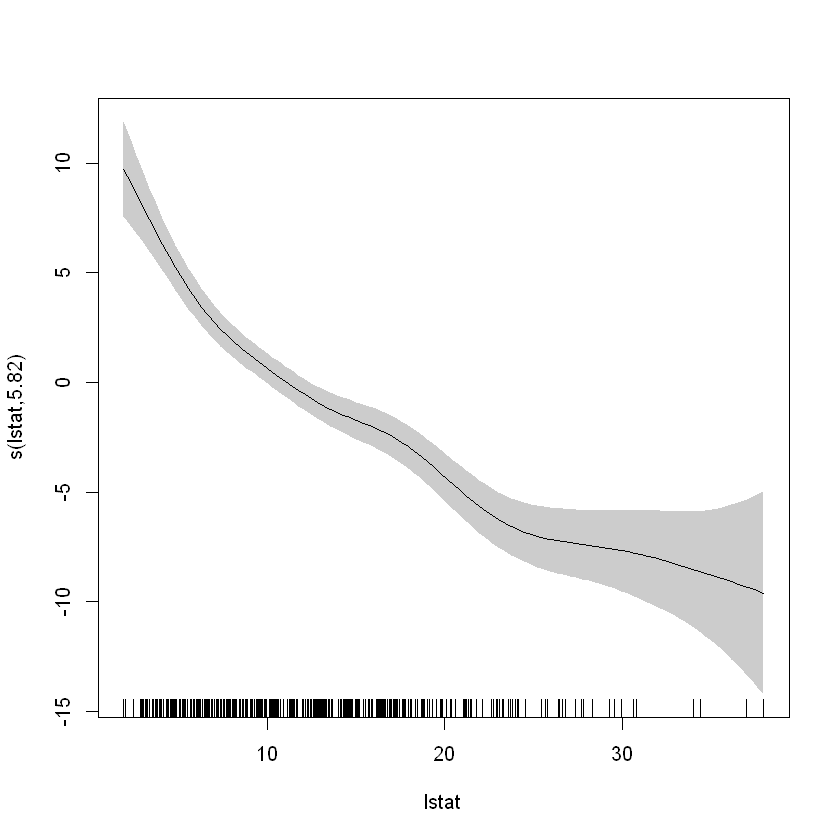

In [58]:
#plot
plot(Boston.gam, shade = TRUE, seWithMean = TRUE, scale = 0)

In [59]:
#In-sample prediction
(Boston.gam.mse <- mean((predict(Boston.gam) - Boston.train$medv) ^ 2))

[1] 7.746904

In [60]:
#Out-of-sample prediction - MSPE
(Boston.gam.mspe <- mean((predict(Boston.gam, newdata = Boston.test) - Boston.test$medv) ^ 2))

[1] 17.14765

Conclusion
Three different methods - linear regression, regression tree and GAM - were used to predict median housing price (medv) in the above problem. In each method, the best possible model was chosen based on its performance using in-sample and out-of-sample data sets. The performance measures used include mean squared error (in-sample) and mean squared prediction error (out-of-sample). Finally, a comprehensive model comparison was done between different methods. Lower the MSPE, better is the model.

It was observed GAM performs the best among the model with lowest out-of-sample MSPE. Moreover, it is able to capture non-linear relations in the data set.